# Object Recognition using Deep Learning

## Problem Statement
 - Object Recognition is one of the important problems in the domain of Computer Vision.
 - It has made great progress over the years because of the Machine Learning algorithms. 
 - The objective of this project is to build a model that classifies images accurately using a CIFAR-10 dataset. 
 - The CIFAR-10 dataset has 60000 32x32 color images with 10 classes, and there are 6000 images in each class.
 - The dataset is divided into train and test with 50000 images in train dataset and 10000 images in the test dataset. 
 - The label classes in the dataset are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. 

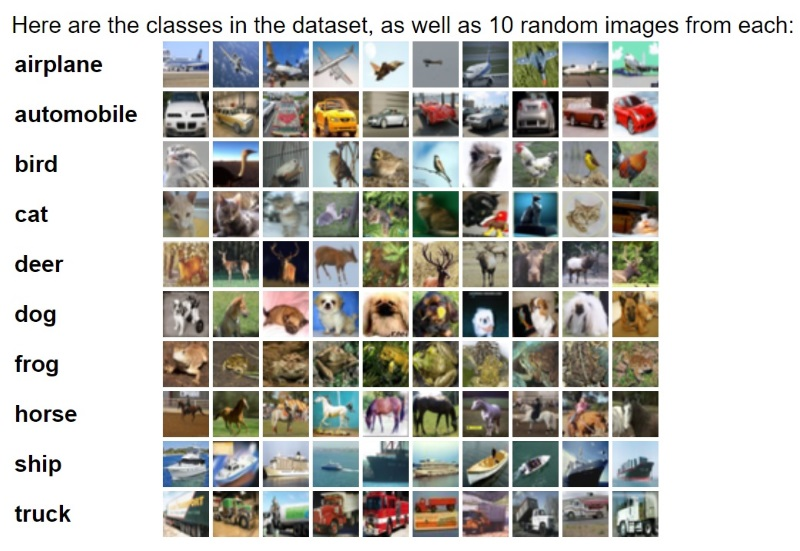

In [11]:
from IPython.display import Image
Image("images/cifar-10.jpg")

## Japanese Farmer, Makoto Koike used Deep Learning to sort Cucumbers

 - An employee in a Japanese automobile industry, while helping out at his parents' cucumber farm, realized that it takes a lot of time and effort to sort cucumbers by size, shape, color and other attributes.
 - At their farm, her mother sorts the cucumbers into nine different classes — spends eight hours per day at peak harvesting times.
 - Makato spent three months taking 7,000 pictures of cucumbers sorted by his mother (80 x 80 pixel)
 - Used a typical Windows desktop PC to train the neural network model, which took 2-3 days to train the model

Source: https://cloud.google.com/blog/big-data/2016/08/how-a-japanese-cucumber-farmer-is-using-deep-learning-and-tensorflow

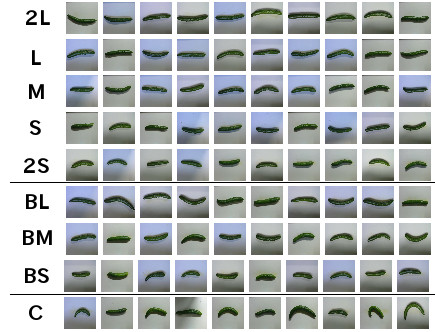

In [9]:
from IPython.display import Image
Image("images/cucumber.png")

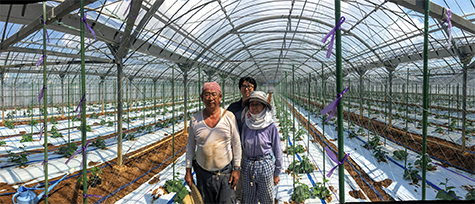

In [10]:
from IPython.display import Image
Image("images/cucumber-farmer.png")

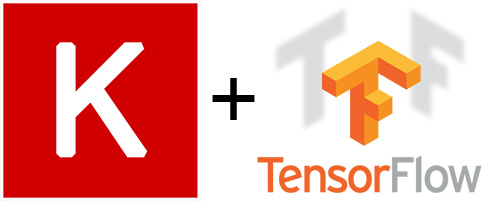

In [1]:
from IPython.display import Image
Image("images/keras-tensorflow-logo.jpg")

# TensorFlow
 - Opensource library by Google for tasks with heavy numerical computations
 - Mainly used in Machine Learning and Deep Learning
 - Has C/C++ Backend, due to which it is faster than Python
 - Faster compile times 
 - Supports GPUs and Distributed Computing


# Keras
 - Neural Network library in Python
 - Built on top of Theano or TensorFlow
 - Simple to use
 - Highly Modular
 - Doesn't require to deal with individual neurons
 - Deals with Layers

## AWS

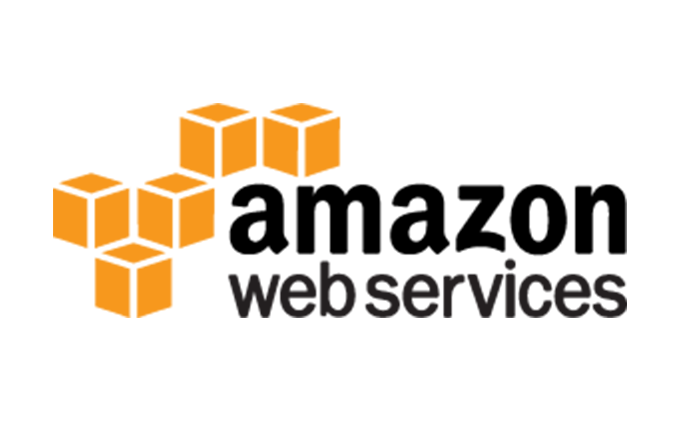

In [14]:
from IPython.display import Image
Image("images/aws1.png")

### Import TensorFlow and Keras

In [84]:
import tensorflow
tensorflow.__version__

'1.4.0'

In [85]:
import keras
keras.__version__

'2.1.0'

### Import the required modules and set the seed to repeat the analysis

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

## Data Setup
### The cifar_10 dataset consists of 60000 images of 32x32 pixels on 3 channels

In [87]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [88]:
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.8, hspace=0.01)
        
    if imfile:
        plt.savefig(imfile)

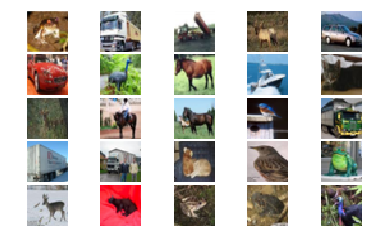

In [89]:
draw_sample(X_train, y_train, 0, 5, 5)

### X_train consists of 50000 images with 32X32 image size and 3 channels

In [21]:
X_train.shape

(50000, 32, 32, 3)

### y_train is a 2D nx1 matrix. So, resize it to get the labels

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train = y_train.reshape(y_train.shape[0])  
y_test = y_test.reshape(y_test.shape[0])

In [24]:
y_train.shape

(50000,)

### Define the labels

In [25]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 150
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

### Normalize the data and convert the labels to categories (One-Hot vectors)

In [27]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
# Convert the labels to categories
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [29]:
y_train.shape

(50000, 10)

### Build the Convolutional Neural Network Model

The model learns 32 convolutional filters, each of which is 3 x 3 in size. The output dimension is the same one of the input shape, so it will be 32 x 32 and activation is 'ReLU', which introduces non-linearity. We have 2 convolutional layers. Then, we have a 'max-pooling' operation with pool size 2 x 2 and a dropout at 25% <br>

Then, we have 2 more convolutional layers, now with 64 filters, each of size 3 x 3, along with 2 x 2 pooling layer with 'max-pooling' operation and a dropout at 25% <br>

After that, we have 3 more convolutional layers, now with 128 filters, each of size 3 x 3, along with 2 x 2 pooling layer with 'max-pooling' operation and a dropout at 25% <br>

The last layer in the deep neural network is a dense network with 512 units and 'ReLU' activation, followed by a dropout at 50%. Then, there is a softmax layer with 10 classes as output, one for each category

In [30]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The seventh convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))


# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [31]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Fit the model
After the network is defined, we can now train the model. The data is split into the train and validation datasets. The training data is used to build the model and the validation dataset is used to check the performance of the model on unseen data.

In [32]:
%%time
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_data=(X_test, y_test),
          shuffle=True,
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
 - 29s - loss: 2.2131 - acc: 0.1559 - val_loss: 2.0729 - val_acc: 0.2504
Epoch 2/150
 - 28s - loss: 1.9782 - acc: 0.2623 - val_loss: 1.8385 - val_acc: 0.3242
Epoch 3/150
 - 28s - loss: 1.7724 - acc: 0.3328 - val_loss: 1.6034 - val_acc: 0.4067
Epoch 4/150
 - 28s - loss: 1.5964 - acc: 0.4101 - val_loss: 1.4249 - val_acc: 0.4707
Epoch 5/150
 - 28s - loss: 1.4622 - acc: 0.4625 - val_loss: 1.3374 - val_acc: 0.5112
Epoch 6/150
 - 28s - loss: 1.3539 - acc: 0.5106 - val_loss: 1.2694 - val_acc: 0.5402
Epoch 7/150
 - 28s - loss: 1.2651 - acc: 0.5448 - val_loss: 1.1286 - val_acc: 0.5943
Epoch 8/150
 - 28s - loss: 1.1868 - acc: 0.5765 - val_loss: 1.0689 - val_acc: 0.6143
Epoch 9/150
 - 28s - loss: 1.1177 - acc: 0.6036 - val_loss: 1.0179 - val_acc: 0.6411
Epoch 10/150
 - 28s - loss: 1.0585 - acc: 0.6270 - val_loss: 1.0073 - val_acc: 0.6481
Epoch 11/150
 - 28s - loss: 1.0093 - acc: 0.6451 - val_loss: 0.8991 - val_acc: 0.6853
Epoch 12/150


Epoch 96/150
 - 28s - loss: 0.1415 - acc: 0.9516 - val_loss: 0.6843 - val_acc: 0.8288
Epoch 97/150
 - 28s - loss: 0.1428 - acc: 0.9513 - val_loss: 0.6751 - val_acc: 0.8319
Epoch 98/150
 - 28s - loss: 0.1418 - acc: 0.9505 - val_loss: 0.6630 - val_acc: 0.8360
Epoch 99/150
 - 28s - loss: 0.1357 - acc: 0.9518 - val_loss: 0.6520 - val_acc: 0.8372
Epoch 100/150
 - 28s - loss: 0.1318 - acc: 0.9548 - val_loss: 0.6909 - val_acc: 0.8342
Epoch 101/150
 - 28s - loss: 0.1306 - acc: 0.9551 - val_loss: 0.6889 - val_acc: 0.8379
Epoch 102/150
 - 28s - loss: 0.1276 - acc: 0.9550 - val_loss: 0.6871 - val_acc: 0.8309
Epoch 103/150
 - 28s - loss: 0.1300 - acc: 0.9547 - val_loss: 0.6931 - val_acc: 0.8351
Epoch 104/150
 - 28s - loss: 0.1282 - acc: 0.9555 - val_loss: 0.6743 - val_acc: 0.8349
Epoch 105/150
 - 28s - loss: 0.1308 - acc: 0.9545 - val_loss: 0.6920 - val_acc: 0.8347
Epoch 106/150
 - 28s - loss: 0.1256 - acc: 0.9574 - val_loss: 0.7026 - val_acc: 0.8361
Epoch 107/150
 - 28s - loss: 0.1273 - acc: 0.95

### The architecture and the weights of the deep neural network is saved in 'json'

In [34]:
model_json = model.to_json()
open('cifar10_architecture_sgd150_7L.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd150_7L.h5')

## Results
### The model reached a test accuracy of 83.71% with 150 iterations

In [35]:
%%time
scores = model.evaluate(X_test, y_test, verbose=2)
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 83.71%
CPU times: user 1.18 s, sys: 64 ms, total: 1.24 s
Wall time: 1.58 s


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Model Accuracy
In the following graph, the accuracy achieved by the above 7-layer neural network on both train and test datasets is reported

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


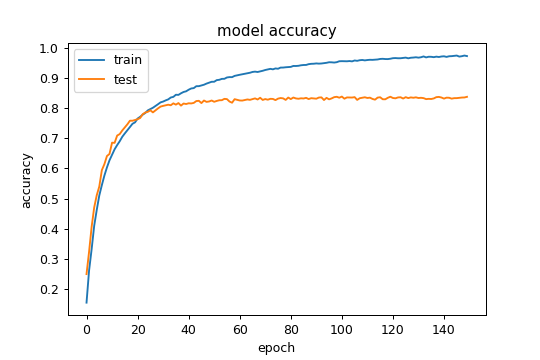

In [37]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Loss
In the following graph, the loss achieved by the above simple neural network on both train and test datasets is reported

<IPython.core.display.Javascript object>


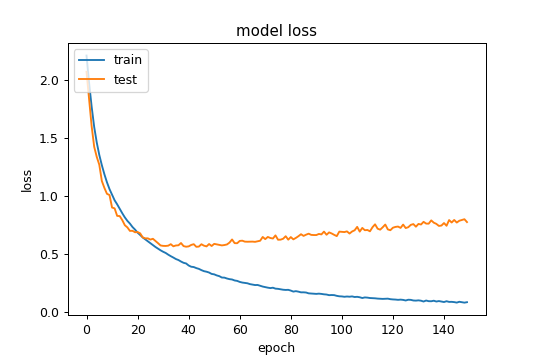

In [38]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix

Most of the misclassifications occurred between "cats" and "dogs"

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[864,  10,  35,  17,  12,   7,   6,   5,  31,  13],
       [  5, 933,   0,   1,   0,   2,   4,   1,  14,  40],
       [ 53,   5, 712,  48,  50,  53,  43,  25,   6,   5],
       [ 16,   3,  36, 656,  43, 157,  53,  22,   8,   6],
       [  4,   2,  40,  36, 823,  36,  30,  24,   3,   2],
       [  3,   2,  18, 112,  19, 804,  10,  29,   3,   0],
       [  7,   3,  12,  24,  18,  13, 911,   7,   1,   4],
       [ 10,   1,   7,  27,  34,  46,   4, 863,   2,   6],
       [ 36,  13,   7,   4,   3,   5,   4,   1, 914,  13],
       [ 19,  53,   2,   6,   1,   5,   7,   5,  11, 891]])

####  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Load the weights and model to predict new images

In [40]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd150_7L.h5'
model_path = 'cifar10_architecture_sgd150_7L.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [41]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [42]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


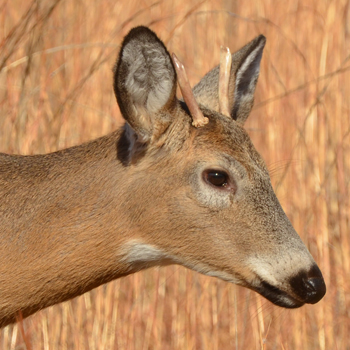

In [43]:
from IPython.display import Image
Image("images/deer.jpg")

### The neural network wrongly predicted the "deer" to be a "cat"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

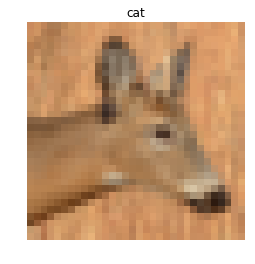

In [44]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

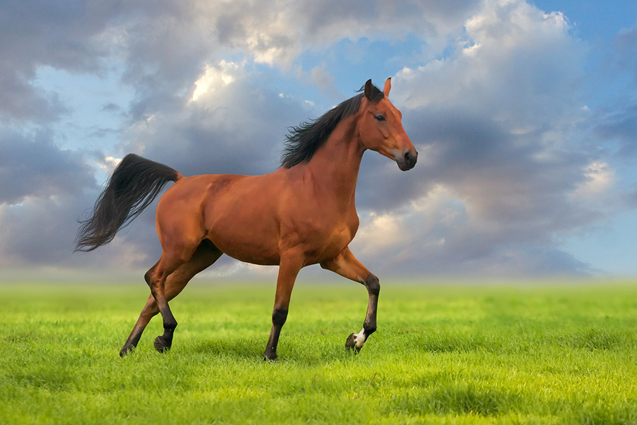

In [45]:
from IPython.display import Image
Image("images/horse.jpg")

### The neural network correctly predicted the "horse" 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

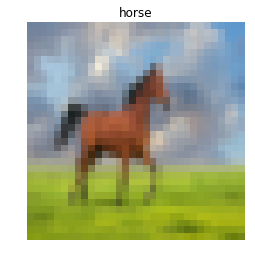

In [46]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

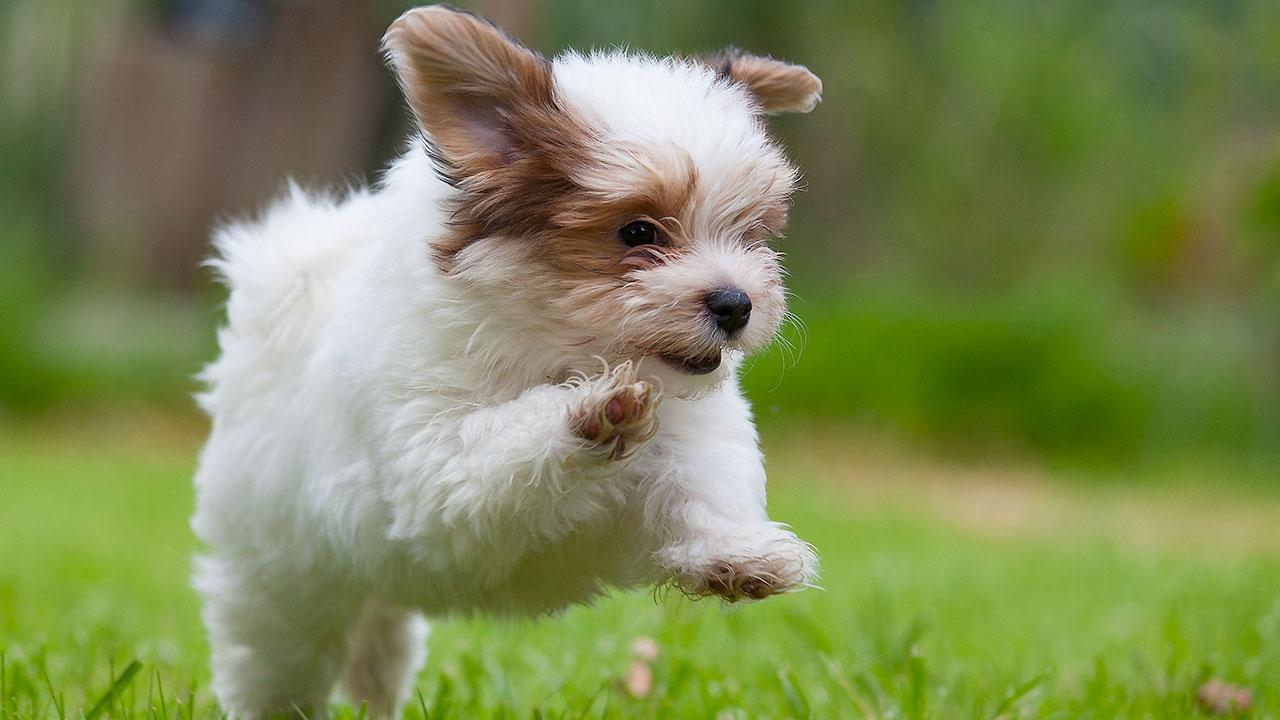

In [47]:
from IPython.display import Image
Image("images/dog.jpg")

### The neural network correctly predicted the "dog" 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

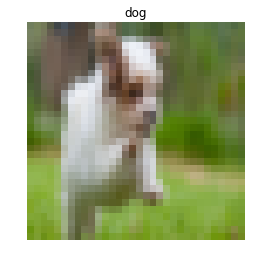

In [48]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

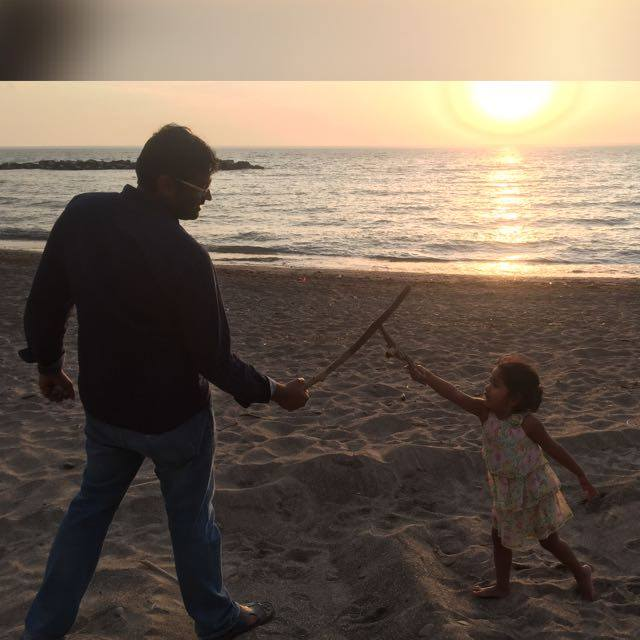

In [49]:
from IPython.display import Image
Image("images/dinesh.jpg")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'deer')

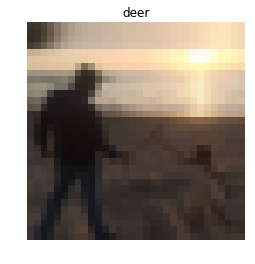

In [50]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

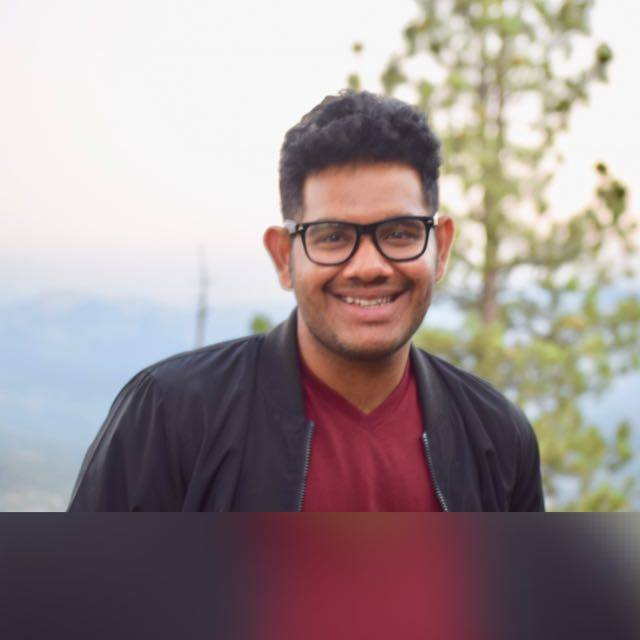

In [51]:
from IPython.display import Image
Image("images/hari.jpg")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'airplane')

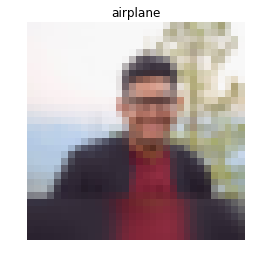

In [53]:
img = preprocess_image('images/hari.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

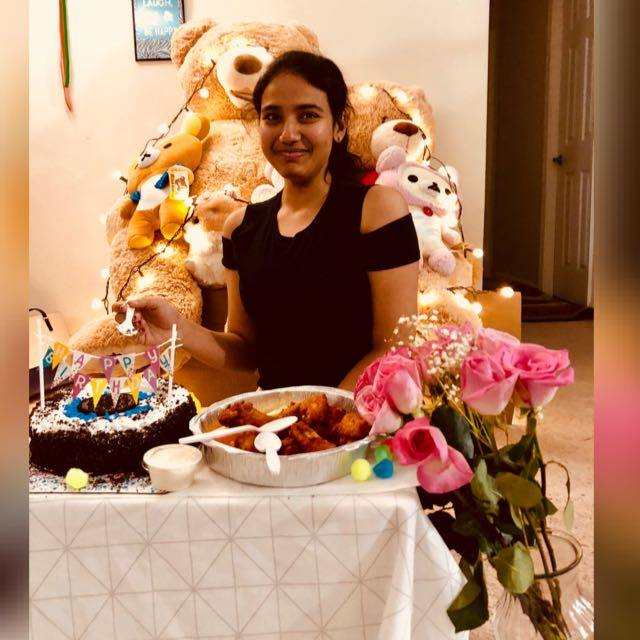

In [54]:
from IPython.display import Image
Image("images/pavani.jpg")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

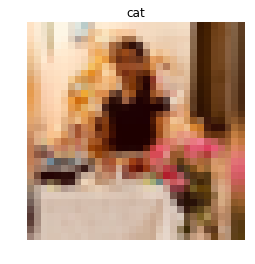

In [55]:
img = preprocess_image('images/pavani.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

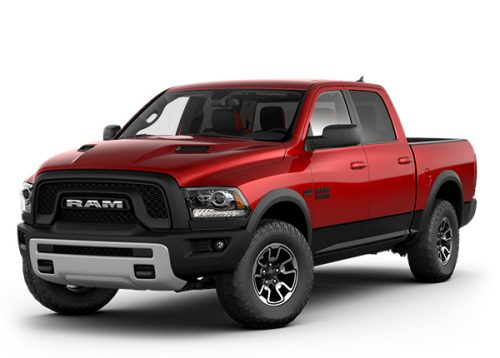

In [56]:
from IPython.display import Image
Image("images/car.jpg")

### The neural network correctly predicted the "car" to be an "automobile"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'automobile')

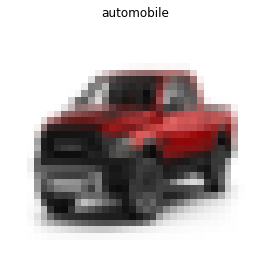

In [57]:
img = preprocess_image('images/car.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

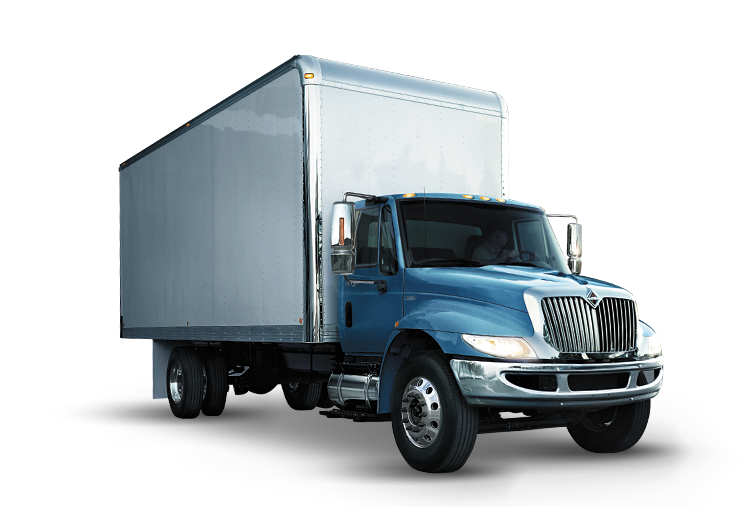

In [59]:
from IPython.display import Image
Image("images/truck.png")

### The neural network correctly predicted the "truck" 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'truck')

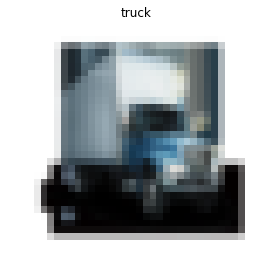

In [60]:
img = preprocess_image('images/truck.png', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### Data Augmentation
Keras has an ImageDataGenerator class that defines the configuration for image data augmentation. This includes various arguments such as:<br>

featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.<br>
samplewise_center: Boolean. Set each sample mean to 0.<br>
featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.<br>
samplewise_std_normalization: Boolean. Divide each input by its std.<br>
zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.<br>
zca_whitening: Boolean. Apply ZCA whitening.<br>
rotation_range: Int. Degree range for random rotations.<br>
width_shift_range: Float (fraction of total width). Range for random horizontal shifts.<br>
height_shift_range: Float (fraction of total height). Range for random vertical shifts.<br>
shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)<br>
zoom_range: Range for random zoom.<br>

The data generator is an iterator, returning batches of image samples when requested.

### First,  an image generator is created by calling the ImageDataGenerator() function and a list of parameters is given which do some alterations on the images<br>

Image augmentation occurs after every epoch, so the model never sees the same image twice.<br>

Randomly rotate images by 50 degrees<br>
Flip images horizontally<br>
Shift images vertically and horizontally by 20%<br>
Randomly zoom the images by 20%<br>

In [61]:
from keras.preprocessing.image import ImageDataGenerator

print("Augment the training dataset...")
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

Augment the training dataset...


### Then, the fit() function is called on image generator which applies changes to the images batch by batch 

In [62]:
datagen.fit(X_train)

In [63]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The seventh convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))


# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [64]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

###  Fit the Model
Then, train the neural network and validate the model on the augmented images using model.fit_generator(). Call the fit_generator() function and pass in the data generator, the samples for each epoch, and also the number of epochs to train.<br>

We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function. The flow() function takes numpy data and label arrays, and generates batches of augmented data. It yields batches indefinitely, in an infinite loop.

In [65]:
%%time
history = model.fit_generator(datagen.flow(X_train, y_train,
          batch_size=batch_size), steps_per_epoch=X_train.shape[0]/batch_size,
          epochs=num_epochs, validation_data = (X_test, y_test), verbose=2)

Epoch 1/150
 - 30s - loss: 2.2929 - acc: 0.1182 - val_loss: 2.2164 - val_acc: 0.1992
Epoch 2/150
 - 29s - loss: 2.1245 - acc: 0.1938 - val_loss: 1.9949 - val_acc: 0.2530
Epoch 3/150
 - 29s - loss: 2.0207 - acc: 0.2330 - val_loss: 1.8756 - val_acc: 0.3036
Epoch 4/150
 - 29s - loss: 1.9384 - acc: 0.2736 - val_loss: 1.7632 - val_acc: 0.3591
Epoch 5/150
 - 29s - loss: 1.8705 - acc: 0.3026 - val_loss: 1.6513 - val_acc: 0.4066
Epoch 6/150
 - 29s - loss: 1.8125 - acc: 0.3306 - val_loss: 1.5910 - val_acc: 0.4269
Epoch 7/150
 - 29s - loss: 1.7554 - acc: 0.3563 - val_loss: 1.5243 - val_acc: 0.4380
Epoch 8/150
 - 29s - loss: 1.6981 - acc: 0.3794 - val_loss: 1.4867 - val_acc: 0.4626
Epoch 9/150
 - 29s - loss: 1.6530 - acc: 0.3956 - val_loss: 1.3973 - val_acc: 0.4891
Epoch 10/150
 - 29s - loss: 1.6192 - acc: 0.4121 - val_loss: 1.4017 - val_acc: 0.4892
Epoch 11/150
 - 29s - loss: 1.5828 - acc: 0.4250 - val_loss: 1.2950 - val_acc: 0.5286
Epoch 12/150
 - 29s - loss: 1.5494 - acc: 0.4369 - val_loss: 1.

Epoch 97/150
 - 29s - loss: 0.8263 - acc: 0.7148 - val_loss: 0.5990 - val_acc: 0.7946
Epoch 98/150
 - 29s - loss: 0.8210 - acc: 0.7162 - val_loss: 0.6188 - val_acc: 0.7841
Epoch 99/150
 - 29s - loss: 0.8241 - acc: 0.7147 - val_loss: 0.5888 - val_acc: 0.7979
Epoch 100/150
 - 29s - loss: 0.8250 - acc: 0.7152 - val_loss: 0.5879 - val_acc: 0.7987
Epoch 101/150
 - 29s - loss: 0.8204 - acc: 0.7163 - val_loss: 0.5848 - val_acc: 0.7959
Epoch 102/150
 - 29s - loss: 0.8162 - acc: 0.7176 - val_loss: 0.5907 - val_acc: 0.7912
Epoch 103/150
 - 29s - loss: 0.8143 - acc: 0.7181 - val_loss: 0.6004 - val_acc: 0.7945
Epoch 104/150
 - 29s - loss: 0.8171 - acc: 0.7183 - val_loss: 0.6057 - val_acc: 0.7875
Epoch 105/150
 - 29s - loss: 0.8064 - acc: 0.7215 - val_loss: 0.5925 - val_acc: 0.7929
Epoch 106/150
 - 29s - loss: 0.8101 - acc: 0.7216 - val_loss: 0.5858 - val_acc: 0.7961
Epoch 107/150
 - 29s - loss: 0.8049 - acc: 0.7219 - val_loss: 0.5893 - val_acc: 0.7967
Epoch 108/150
 - 29s - loss: 0.8041 - acc: 0.7

### The architecture and the weights of the deep neural network is saved in 'json'

In [67]:
model_json = model.to_json()
open('cifar10_architecture_sgd150_7L_aug.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd150_7L_aug.h5')

### The model reached a test accuracy of 81.53% with 150 iterations

In [68]:
%%time
scores = model.evaluate(X_test, y_test, verbose=0)
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 81.53%
CPU times: user 1.22 s, sys: 36 ms, total: 1.26 s
Wall time: 1.6 s


In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Model Accuracy
In the following graph, the accuracy achieved by the above 7-layer neural network on both train and test datasets is reported

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


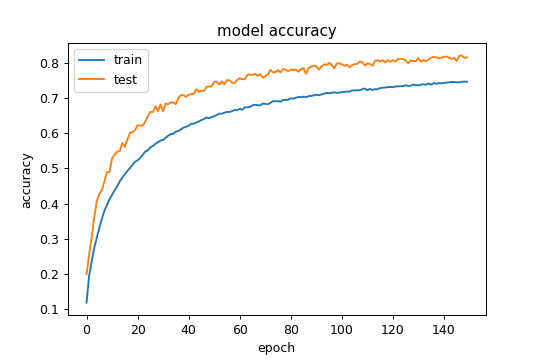

In [70]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Loss
In the following graph, the loss achieved by the above simple neural network on both train and test datasets is reported

<IPython.core.display.Javascript object>


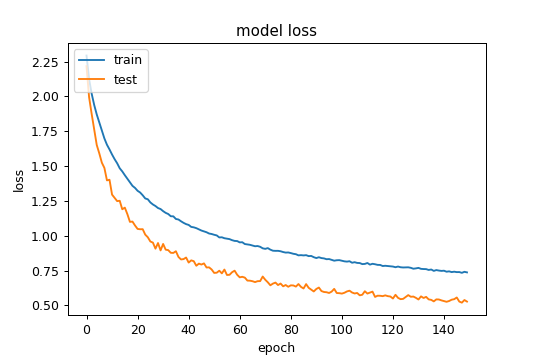

In [71]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[715,  20,  33,  19,  15,   1,   5,  27, 107,  58],
       [  2, 935,   1,   2,   0,   2,   1,   2,  13,  42],
       [ 28,   9, 720,  22,  69,  44,  64,  19,  14,  11],
       [  5,   4,  51, 574,  46, 205,  57,  24,  22,  12],
       [  5,   1,  32,  20, 798,  31,  52,  50,   6,   5],
       [  2,   4,  25,  60,  31, 822,  12,  34,   2,   8],
       [  4,   3,  16,  24,  24,  18, 894,   5,   4,   8],
       [  5,   1,  21,  14,  16,  39,   6, 882,   2,  14],
       [ 17,  14,   4,   5,   3,   3,   2,   0, 929,  23],
       [  7,  63,   6,   9,   0,   3,   7,   6,  15, 884]])

####  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Load the weights and model to predict new images

In [73]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd100_7L_aug2.h5'
model_path = 'cifar10_architecture_sgd100_7L_aug2.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [74]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [75]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


### The neural network wrongly predicted the "deer" to be a "cat"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

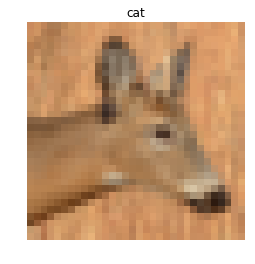

In [76]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### The neural network correctly predicted the "horse" 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

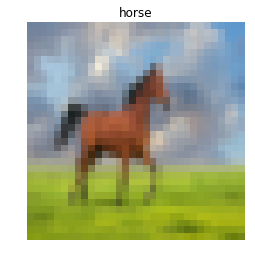

In [77]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### The neural network correctly predicted the "dog" 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

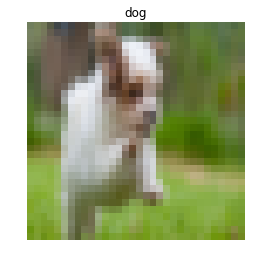

In [78]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

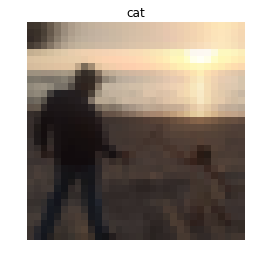

In [79]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

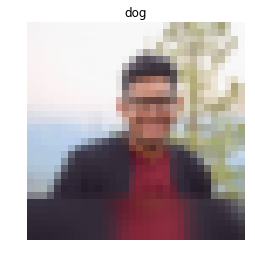

In [80]:
img = preprocess_image('images/hari.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

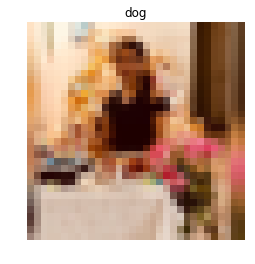

In [81]:
img = preprocess_image('images/pavani.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### The neural network correctly predicted the "car" to be an "automobile"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'automobile')

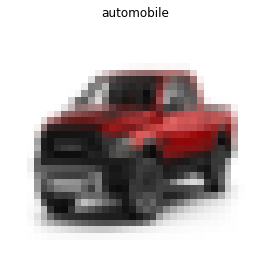

In [82]:
img = preprocess_image('images/car.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### The neural network correctly predicted the "truck"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'truck')

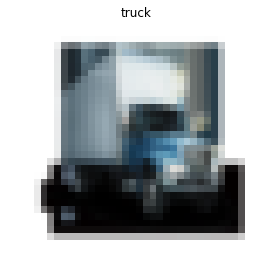

In [83]:
img = preprocess_image('images/truck.png', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

### Plot and compare accuracy of different algorithms on train and test datasets

In [27]:
from bokeh import __version__ as bokeh_version
print("Bokeh - %s" % bokeh_version) 

Bokeh - 0.12.13


In [28]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [32]:
from bokeh.models import FactorRange

classifier = ['Decision Tree', 'Gradient Boosting', 'Naive Bayes', 'k-NN', 'SVM', '4-L CNN', '7-L CNN']
dataset = ['train', 'test']

data = {'classifier' : classifier,
        'train'   : [100, 57.75, 28.47, 50.53, 44.47, 94.57, 97.19],
        'test'   : [27, 47.81, 29.76, 33.98, 43.98, 81.96, 83.71]}

x = [ (classifier, data_set) for classifier in classifier for data_set in dataset ]
counts = sum(zip(data['train'], data['test']), ())           # like a hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_width=900, plot_height=450, title="Accuracy (%)")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1          # added some padding around the categorical range (at both ends of the axis)
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [33]:
from bokeh.transform import factor_cmap

p = figure(x_range=FactorRange(*x), plot_width=900, plot_height=450, title="Accuracy Plot (%)")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",

       # use the palette to colormap based on the the x[1:2] values
       fill_color=factor_cmap('x', palette=['red', 'blue'], factors=dataset, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

## References
https://github.com/JacobPolloreno/cifar10_keras<br>
Deep Learning with Keras by Antonio Gulli and Sujit Pal<br>
http://www.samyzaf.com/ML/cifar10/cifar10.html<br>
https://github.com/charlesgreen/keras_cifar10_cnn/blob/master/keras_cifar10_cnn/cifar10_cnn.py<br>
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/<br>
https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14<br>
https://keras.io/preprocessing/image/<br>
https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085<br>
https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html<br>
http://softwarelogic.net/amazon-web-services-training-course-in-pondicherry-bangalore/<br>
https://cloud.google.com/blog/big-data/2016/08/how-a-japanese-cucumber-farmer-is-using-deep-learning-and-tensorflow